In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

In [2]:
# 1. 데이터 로드
# URL = "/content/drive/MyDrive/SIL/WORK/DSS 머신러닝2/" # 데이터 위치 설정
df = pd.read_csv("dataset/Dataset1.csv")

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,y
0,NaN,-8.332362,NaN,8.302280,NaN,NaN,NaN,NaN,NaN,13.304436,1
1,11.448997,NaN,NaN,NaN,-0.342397,-15.769473,NaN,NaN,NaN,1.843013,0
2,NaN,-6.672742,2.624154,NaN,-3.984211,NaN,NaN,5.787549,NaN,NaN,1
3,NaN,1.316167,NaN,7.662807,7.701769,-10.596706,NaN,-9.543697,NaN,NaN,0
4,0.037964,-11.019043,NaN,12.071796,-3.700980,-0.913793,NaN,NaN,NaN,10.791092,1
...,...,...,...,...,...,...,...,...,...,...,...
245,NaN,NaN,10.934405,NaN,-4.470589,6.895674,-9.914487,-2.612231,-11.575178,7.144047,1
246,7.037268,-9.615862,NaN,NaN,-10.904392,4.734977,-7.132268,-8.093475,-10.649041,NaN,1
247,6.510723,-5.980293,4.603470,13.290178,NaN,NaN,NaN,NaN,NaN,NaN,1
248,NaN,NaN,NaN,NaN,-0.697905,5.393760,-11.424349,NaN,-9.976622,13.935222,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       126 non-null    float64
 1   1       125 non-null    float64
 2   2       122 non-null    float64
 3   3       116 non-null    float64
 4   4       135 non-null    float64
 5   5       126 non-null    float64
 6   6       111 non-null    float64
 7   7       125 non-null    float64
 8   8       122 non-null    float64
 9   9       124 non-null    float64
 10  y       250 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 21.6 KB


In [5]:
data_X = df.drop(["y"], axis = 1)
data_Y = df['y']

In [6]:
# 평가 지표 출력 함수
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix

def print_all_reg(Y_test,pred):
    # Specificity를 구하기 위해 confusion matrix를 이용
    cm1 = confusion_matrix(Y_test,pred)
    specificity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1]) # TN/(TN + FP), 정상데이터 중 모델이 정상으로 옳게 분류한 비율

    #결과 검사
    #recall = cm1[1,1]/(cm1[1,1]+cm1[1,0]) # TP/(TP + FN), 불량데이터 중 모델이 불량으로 옳게 분류한 데이터 비율
    #pre = cm1[1,1]/(cm1[1,1]+cm1[0,1]) # TP/(TP + FP), 모델이 불량으로 분류한 데이터 중 실제 불량데이터 비율

    G_mean = recall_score(Y_test,pred) * specificity1

    print("model의 recall 값은 {:.3f}".format(recall_score(Y_test,pred)))
    print("model의 2종 오류 확률 값은 {:.3f}".format(1-recall_score(Y_test,pred)))
    print("model의 Specificity 값은 {:.3f}".format(specificity1))
    print("model의 1종 오류 확률 값은 {:.3f}".format(1-specificity1))
    print("model의 precision 값은 {:.3f}".format(precision_score(Y_test,pred)))
    print("model의 f1_score 값은 {:.3f}".format(f1_score(Y_test,pred)))
    print("model의 G-mean 값은 {:.3f}".format(np.sqrt(G_mean)))
    print("model의 accuracy 값은 {:.3f}".format(accuracy_score(Y_test,pred)))

# 문제1-(a)

In [7]:
data_X.fillna(0, inplace=True)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2
                                                    # , stratify=data_Y
                                                    , random_state=22,shuffle =True)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ParameterGrid
# 원하는 파라미터 설정 (파라미터를 추가하려면 위의 함수에도 추가해줘야함.)
# 사전 가지치기를 위한 하이퍼 파라미터들
params={
    "max_depth":[4,5,6,7,8,9,10],
    "min_samples_leaf" : [2, 3, 4, 5, 6],
    "min_samples_split" : range(2,8,2), #2, 4, 6
    "max_leaf_nodes": [5,10,15]
}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(params)) # 4x3x3x3 = 총 108개의 경우의수를 담은 리스트 반환
print(params_list[0])
print(" ")

# Grid search 진행
score_list = []
for params2 in params_list:
    model_use = DecisionTreeClassifier(random_state = 0,max_depth = params2["max_depth"],min_samples_leaf = params2["min_samples_leaf"],
                                   min_samples_split = params2["min_samples_split"],max_leaf_nodes = params2["max_leaf_nodes"]
                                  )
    model_use.fit(X_train, Y_train)
    valid_pred = model_use.predict(X_test)
    tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
    score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
 
BEST SCORE 0.9387755102040816
BEST PARAMS {'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [10]:
# best case의 하이퍼파라미터로 의사결정나무 학습

model_use = DecisionTreeClassifier(random_state = 0,max_depth = params_list[best_index]["max_depth"],min_samples_leaf = params_list[best_index]["min_samples_leaf"],
                                   min_samples_split = params_list[best_index]["min_samples_split"],max_leaf_nodes = params_list[best_index]["max_leaf_nodes"]
                                  )
model_use.fit(X_train, Y_train)
pred_train = model_use.predict(X_train)
pred_test = model_use.predict(X_test)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)

0.9387755102040816
Train 데이터 성능
model의 recall 값은 0.939
model의 2종 오류 확률 값은 0.061
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 0.969
model의 G-mean 값은 0.969
model의 accuracy 값은 0.970
 
TEST 데이터 성능
model의 recall 값은 0.885
model의 2종 오류 확률 값은 0.115
model의 Specificity 값은 1.000
model의 1종 오류 확률 값은 0.000
model의 precision 값은 1.000
model의 f1_score 값은 0.939
model의 G-mean 값은 0.941
model의 accuracy 값은 0.940


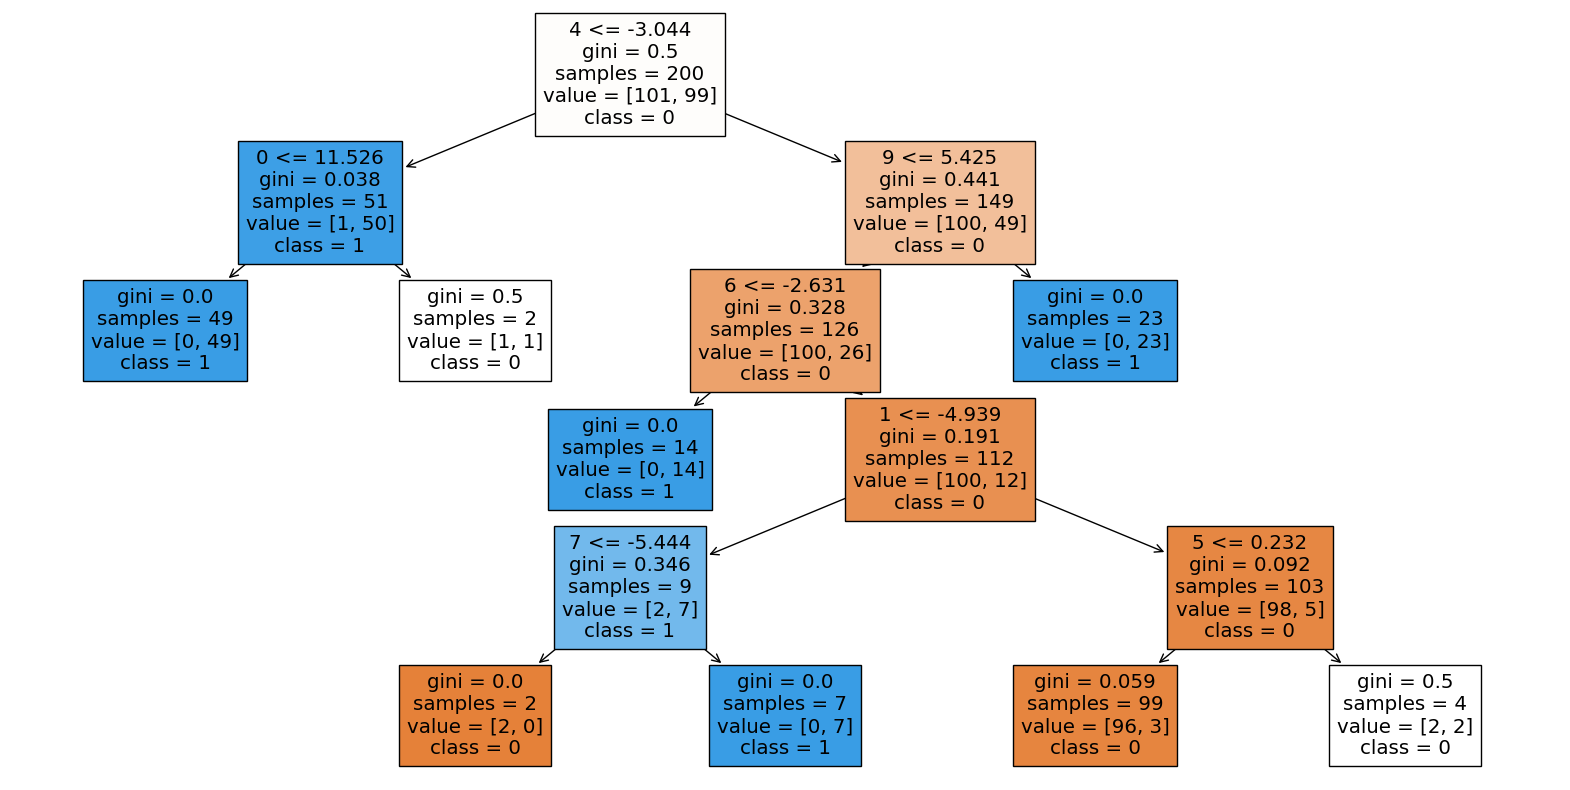

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 의사결정나무 시각화
plt.figure(figsize=(20,10))
plot_tree(model_use, filled=True, feature_names=data_X.columns, class_names=["0", "1"])
plt.show()

# 문제1-(b)

## 코드 진행 순서


practice1_3, practice2_1 참조하여 진행하시면 됩니다!

- train_test_split 진행
- 사용할 파라미터 설정->**결측치처리**: 'n_neighbors', **DT**: "max_depth", "min_samples_leaf", "min_samples_split", "max_leaf_nodes"
- param_list 설정
  - for문으로 파라미터 조합마다 반복하도록 설정
  - 결측치 보완(n_neighbors=params2["K"])
  - 평가모델 param_list에 있는 하이퍼 파라미터들로 정의
- 성능평가

In [12]:
#스케일링 진행 X
from sklearn.impute import KNNImputer
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

data_X = df.drop(["y"], axis = 1)
data_Y = df['y']

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=3)

params={
    "K":range(1,8,1),
    "max_depth":range(1,6,1),
    "min_samples_leaf" : range(1,5,1),
    "min_samples_split" : range(2,6,1),
    "max_leaf_nodes": range(2,11,2)
}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(params)) # 6x4x3x4 = 총 288개의 경우의수를 담은 리스트 반환

K = list(range(1,10,1)) # 탐색할 K를 리스트에 저장
K_acc = []
score_list = []
for params2 in params_list: # K에 포함된 수만큼 반복
  # 결측치 보완
  # print(" ")
  imputer_knn = KNNImputer(n_neighbors=params2["K"]) #
  # 모델 정의
  X_train_impute = imputer_knn.fit_transform(X_train) # 학습 및 변환
  X_test_impute = imputer_knn.transform(X_test) # 변환

  model_use = DecisionTreeClassifier(random_state = 100,max_depth = params2["max_depth"],min_samples_leaf = params2["min_samples_leaf"],
                                   min_samples_split = params2["min_samples_split"],max_leaf_nodes = params2["max_leaf_nodes"]
                                  )
  model_use.fit(X_train_impute, Y_train)
  valid_pred = model_use.predict(X_test_impute)
  tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
  score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.9811320754716981
BEST PARAMS {'K': 6, 'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [13]:
imputer_knn = KNNImputer(n_neighbors=6) #

X_train_impute = imputer_knn.fit_transform(X_train) # 학습 및 변환
X_test_impute = imputer_knn.transform(X_test) # 변환



model_use = DecisionTreeClassifier(random_state = 100,max_depth = params_list[best_index]["max_depth"],min_samples_leaf = params_list[best_index]["min_samples_leaf"],
                                   min_samples_split = params_list[best_index]["min_samples_split"],max_leaf_nodes = params_list[best_index]["max_leaf_nodes"]
                                  )
model_use.fit(X_train_impute, Y_train)
pred_train = model_use.predict(X_train_impute)
pred_test = model_use.predict(X_test_impute)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)

0.9811320754716981
Train 데이터 성능
model의 recall 값은 0.990
model의 2종 오류 확률 값은 0.010
model의 Specificity 값은 0.990
model의 1종 오류 확률 값은 0.010
model의 precision 값은 0.990
model의 f1_score 값은 0.990
model의 G-mean 값은 0.990
model의 accuracy 값은 0.990
 
TEST 데이터 성능
model의 recall 값은 1.000
model의 2종 오류 확률 값은 0.000
model의 Specificity 값은 0.958
model의 1종 오류 확률 값은 0.042
model의 precision 값은 0.963
model의 f1_score 값은 0.981
model의 G-mean 값은 0.979
model의 accuracy 값은 0.980


# 문제1-(c)

- train_test_split 진행
- 사용할 파라미터 설정->**결측치처리**: 'n_neighbors', **DT**: "max_depth", "min_samples_leaf", "min_samples_split", "max_leaf_nodes"
- param_list 설정
  - for문으로 파라미터 조합마다 반복하도록 설정
  - 결측치 보완(n_neighbors=params2["K"])
  - 스케일링 진행
  - 평가모델 param_list에 있는 하이퍼 파라미터들로 정의
- 성능평가

In [14]:
#MinMax 스케일링 진행
from sklearn.impute import KNNImputer
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

data_X = df.drop(["y"], axis = 1)
data_Y = df['y']

In [18]:


X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=3)

params={
    "K":range(1,8,1),
    "max_depth":range(1,6,1),
    "min_samples_leaf" : range(1,5,1),
    "min_samples_split" : range(2,6,1),
    "max_leaf_nodes": range(2,11,2)
}

# ParameterGrid 통해서 모든 경우의 수 만들기
params_list = list(ParameterGrid(params)) # 6x4x3x4 = 총 288개의 경우의수를 담은 리스트 반환

K = list(range(1,10,1)) # 탐색할 K를 리스트에 저장
K_acc = []
score_list = []
for params2 in params_list: # K에 포함된 수만큼 반복
    # 결측치 보완
    # print(" ")
    imputer_knn = KNNImputer(n_neighbors=params2["K"]) #
    # 모델 정의
    X_train_impute = imputer_knn.fit_transform(X_train) # 학습 및 변환
    X_test_impute = imputer_knn.transform(X_test) # 변환
    
    #MinMax Scaler 진행
    scaler = MinMaxScaler()
    scaler.fit(X_train_impute)
    X_train_impute = scaler.transform(X_train_impute)
    X_test_impute = scaler.transform(X_test_impute)

    model_use = DecisionTreeClassifier(random_state = 100,max_depth = params2["max_depth"],min_samples_leaf = params2["min_samples_leaf"],
                                   min_samples_split = params2["min_samples_split"],max_leaf_nodes = params2["max_leaf_nodes"]
                                  )
    model_use.fit(X_train_impute, Y_train)
    valid_pred = model_use.predict(X_test_impute)
    tem = f1_score(valid_pred,Y_test) # 성능지표 = f1-score 사용
    score_list.append(tem)

# BEST SCORE 계산
best_index= np.argmax(score_list) # 가장 높은 f1-score 갖는 경우를 best case로 설정
print("BEST SCORE", score_list[best_index])
print("BEST PARAMS", params_list[best_index])

BEST SCORE 0.9811320754716981
BEST PARAMS {'K': 6, 'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [20]:
imputer_knn = KNNImputer(n_neighbors=6) #

X_train_impute = imputer_knn.fit_transform(X_train) # 학습 및 변환
X_test_impute = imputer_knn.transform(X_test) # 변환

#MinMax Scaler 진행
scaler = MinMaxScaler()
scaler.fit(X_train_impute)
X_train_impute = scaler.transform(X_train_impute)
X_test_impute = scaler.transform(X_test_impute)

model_use = DecisionTreeClassifier(random_state = 100,max_depth = params_list[best_index]["max_depth"],min_samples_leaf = params_list[best_index]["min_samples_leaf"],
                                   min_samples_split = params_list[best_index]["min_samples_split"],max_leaf_nodes = params_list[best_index]["max_leaf_nodes"]
                                  )
model_use.fit(X_train_impute, Y_train)
pred_train = model_use.predict(X_train_impute)
pred_test = model_use.predict(X_test_impute)
tem = f1_score(Y_test,pred_test)
print(tem)

#출력
print("Train 데이터 성능")
print_all_reg(Y_train,pred_train)
print(" ")
print("TEST 데이터 성능")
print_all_reg(Y_test,pred_test)

0.9811320754716981
Train 데이터 성능
model의 recall 값은 0.990
model의 2종 오류 확률 값은 0.010
model의 Specificity 값은 0.990
model의 1종 오류 확률 값은 0.010
model의 precision 값은 0.990
model의 f1_score 값은 0.990
model의 G-mean 값은 0.990
model의 accuracy 값은 0.990
 
TEST 데이터 성능
model의 recall 값은 1.000
model의 2종 오류 확률 값은 0.000
model의 Specificity 값은 0.958
model의 1종 오류 확률 값은 0.042
model의 precision 값은 0.963
model의 f1_score 값은 0.981
model의 G-mean 값은 0.979
model의 accuracy 값은 0.980
